In [5]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
import matplotlib.pyplot as plt 
import cv2
import numpy as np

from model import CycleGan
from loader import KindaLoadEverything, Sampler

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

#region setup
BUILD = "build"
LOAD = "load"

RUN_ID = "0004"
DOM_A = "./data/a"
DOM_B = "./data/b"
RUNFOLDER = os.path.join("run", RUN_ID)  
#endregion

gan = CycleGan()

# gan.loadWeights(RUNFOLDER)
# gan.loadCombinedFromCheckpoint("./run/0003/weights/weights-40.h5")  # pretty decent looking, if rough
gan.loadCombinedFromCheckpoint("./run/0004/weights/weights-21.h5")

sampler = Sampler("./data/simkai.ttf")


Images shape: (20, 128, 128, 3)
1/1 [==============================] - 0s 195ms/step
Output shape: (20, 128, 128, 3)


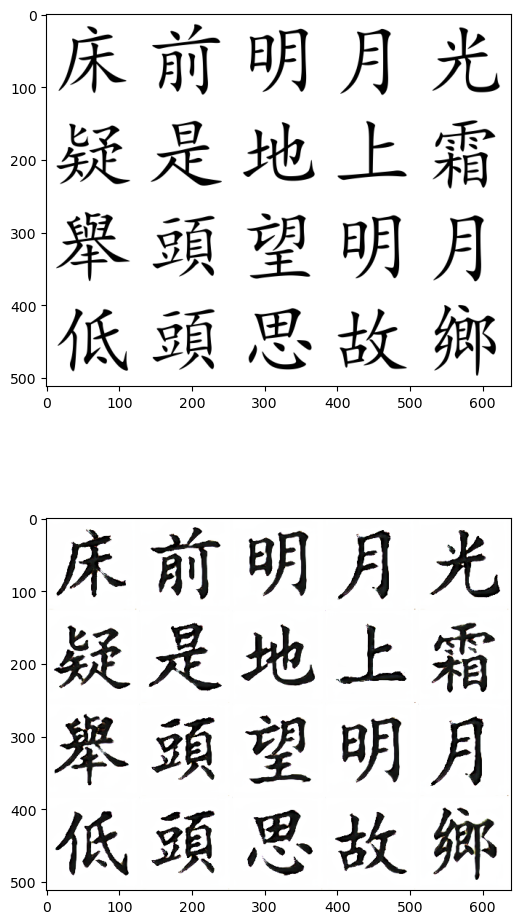

In [6]:
SUTRINGU = "床前明月光疑是地上霜舉頭望明月低頭思故鄉"
# SUTRINGU = "床前明月光李白爬上床看见X光，裤子掉光光"

original = np.array(sampler.generateImages(SUTRINGU))
originalStitched = sampler.stitchImages(original, columns=5)
converted = gan.predict(sampler, SUTRINGU)
stitched = sampler.stitchImages(converted, columns=5)

fig, ax = plt.subplots(2,1,figsize=(6,12))
ax[0].imshow(originalStitched)
ax[1].imshow(stitched)